In [2]:
#import required libraries
import matplotlib.pyplot as plt
import numpy as np
import shutil
%matplotlib inline
import os
import skimage.io as io
import os

In [3]:
import skimage
def _read_img(image_path):
    img = skimage.io.imread(image_path, plugin='tifffile')
    return img

In [4]:
imdir = r"C:\Users\CBS-7\Desktop\Aerial_LULC\Burak_havafoto\Aksu\Data\Aksu_aerial_OBC_RasteClC.tif"

In [5]:
IM = io.imread(imdir)

In [6]:
IM.shape

(16978, 13642)

In [7]:
IM.dtype

dtype('uint16')

In [8]:
a, b = np.unique(IM, return_counts= True)

In [9]:
a, b

(array([    0,   112,   122,   211,   221,   241,   311,   511, 65535],
       dtype=uint16),
 array([152274356,    605421,    286778,  32041069,    189615,  11263197,
         31539937,    119536,   3293967], dtype=int64))

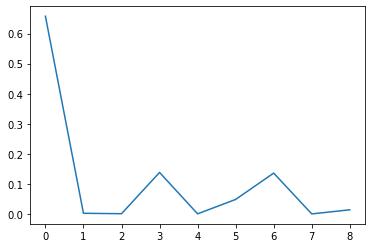

In [17]:
b = b / sum(b)

plt.plot(b)

In [19]:
labels = ['NoData',
               'Forest',
               'Mine, dump and construction sites',
                'Road and Rail',
                'Discontinious Urban Fabric',
               'Arable Land',
               'Heterogeneous agricultural areas',
                'Permenant Crops',
                'Inland Waters',
                'Artificial, non-agricultural vegetated areas'] 

palette ={ 0 : (0,0,0),  #no data
           1 : (128, 255, 0), #forest
           2 : (166, 0, 204), #mine
           3 : (204, 0, 0), #road
           4 : (255, 0, 0), #disc urban   
           5 : (255, 255, 168), #arable land
           6 : (255,230,166), #heteregonous agricultural areas
           7 : (231, 40, 252), #permenant crops
           8 : (0, 204, 242),  #inland waters
           9 : (255, 166, 255),  #artificial non-agricultural vegetated areas
         }

invert_palette = {v: k for k, v in palette.items()}

def convert_to_color(arr_2d, palette=palette):
    """ Numeric labels to RGB-color encoding """
    arr_3d = np.zeros((arr_2d.shape[0], arr_2d.shape[1], 3), dtype=np.uint8)

    for c, i in palette.items():
        m = arr_2d == c
        arr_3d[m] = i

    return arr_3d

def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

In [20]:
colored_mask = convert_to_color(IM)

In [21]:
a, b = np.unique(IM, return_counts= True)

In [22]:
a, b

(array([    0,   112,   122,   211,   221,   241,   311,   511, 65535],
       dtype=uint16),
 array([152274356,    605421,    286778,  32041069,    189615,  11263197,
         31539937,    119536,   3293967], dtype=int64))

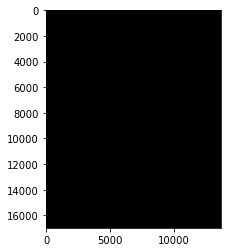

In [23]:
plt.imshow(colored_mask)

In [16]:
save_path = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\colored_mask\GT_colored.tif"

In [24]:
io.imsave(save_path, colored_mask) #no CRS 

NameError: name 'save_path' is not defined

In [ ]:
#### 957 ilk başta, silmeden önce

In [28]:
# helper function for data visualization
def visualize_in_one_row(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    

def visualize(image):
    # Divide all values by 65535 so we can display the image using matplotlib
    image = image / 65535
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image, cmap = 'Greys_r')

In [29]:
import tifffile

In [30]:
class Dataset():
    
    def __init__(
            self, 
            optic_dir,
            mask_dir):
        
        self.optic_ids = os.listdir(optic_dir)
        self.mask_ids = os.listdir(mask_dir)
        
        self.optic_fps = [os.path.join(optic_dir, image_id) for image_id in self.optic_ids]
        self.masks_fps = [os.path.join(mask_dir, image_id) for image_id in self.mask_ids]
        
    def __getitem__(self, i):
        
        optic_id = self.optic_fps[i].split('\\')[-1]
        mask_id = self.masks_fps[i].split('\\')[-1]
        
        optic = tifffile.imread(self.optic_fps[i])
        mask = tifffile.imread(self.masks_fps[i])

        return optic, mask
    
    def __len__(self):
        return len(self.mask_ids)

In [35]:
dataset_dir = r"C:\Users\CBS-7\Desktop\Satellite_LCLU\Aksu\Patches"

m_dir = os.path.join(dataset_dir, "mask", "tif")
o_dir = os.path.join(dataset_dir, "image", "tif")

In [36]:
viz_dataset = Dataset(optic_dir = o_dir, 
                        mask_dir = m_dir)

In [37]:
optic, mask = viz_dataset[np.random.randint(len(viz_dataset))]


In [38]:
optic.dtype, optic.shape, optic.max()

(dtype('uint16'), (512, 512, 4), 1458)

In [39]:
mask.dtype, mask.shape, mask.max()

(dtype('uint8'), (512, 512, 3), 255)

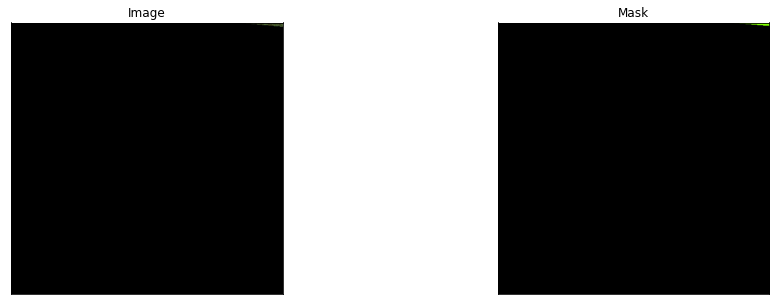

In [49]:
def scale_range(input, min, max):
    input += -(np.min(input))
    input /= (1e-9 + np.max(input) / (max - min + 1e-9))
    input += min
    return input

optic, mask = viz_dataset[np.random.randint(len(viz_dataset))]

visualize_in_one_row(Image = scale_range(optic.astype('float'), 0, 255)[...,:3].astype(np.uint8) ,
           mask = mask)

In [27]:
optic.shape, optic.dtype, mask.shape, mask.dtype

((512, 512, 4), dtype('uint16'), (512, 512, 3), dtype('uint8'))

# SPLIT THE PATCHES INTO TRAIN VAL AND TEST RANDOMLY

## Delete non square and empty masks with sar and optic correspondings 

In [50]:
import os
import skimage.io
import numpy as np
import glob
import shutil

In [51]:
#original
def _read_img(image_path):
    img = skimage.io.imread(image_path, plugin='tifffile')
    return img

deleted_ids = []

path = r"C:\Users\CBS-7\Desktop\Satellite_LCLU\Aksu\Patches\Mask\tif"

for filename in os.listdir(path):
    img = _read_img(path + '\\' + filename)
    sum_of_pixels = np.sum(img)
    if sum_of_pixels == 0 or img.shape[0] != img.shape[1]:
        last = filename.split('.')[0].split('_')[-1]
        before = filename.split('.')[0].split('_')[-2]
        id_ = before + '_' + last
        deleted_ids.append(id_)
        os.remove(path + '\\' + filename)

In [52]:
len(deleted_ids) # 957 ---> 599

0

In [32]:
for i in range(len(os.listdir(r"C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Patches\Image\tif"))):
    for fileloc in glob.iglob(r'C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Patches\Image\tif\true_color_image_{}.tif'.format(deleted_ids[i])):
        os.remove(fileloc)

IndexError: list index out of range

### Split  

In [6]:
import os
import numpy as np

ids__ = os.listdir(r"C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Patches\Mask\tif")
all_ids = []

for x,i in enumerate(ids__):
    last = ids__[x].split('.')[0].split('_')[-1]
    before = ids__[x].split('.')[0].split('_')[-2]
    id_ = before + '_' + last
    all_ids.append(id_)

In [7]:
all_ids

['01_12',
 '01_13',
 '01_14',
 '01_15',
 '01_16',
 '02_07',
 '02_08',
 '02_09',
 '02_10',
 '02_11',
 '02_12',
 '02_13',
 '02_14',
 '02_15',
 '02_16',
 '02_17',
 '03_07',
 '03_08',
 '03_09',
 '03_10',
 '03_11',
 '03_12',
 '03_13',
 '03_14',
 '03_15',
 '03_16',
 '03_17',
 '04_07',
 '04_08',
 '04_09',
 '04_10',
 '04_11',
 '04_12',
 '04_13',
 '04_14',
 '04_15',
 '04_16',
 '04_17',
 '05_06',
 '05_07',
 '05_08',
 '05_09',
 '05_10',
 '05_11',
 '05_12',
 '05_13',
 '05_14',
 '05_15',
 '05_16',
 '05_17',
 '05_18',
 '05_20',
 '05_21',
 '06_06',
 '06_07',
 '06_08',
 '06_09',
 '06_10',
 '06_11',
 '06_12',
 '06_13',
 '06_14',
 '06_15',
 '06_16',
 '06_17',
 '06_18',
 '06_19',
 '06_20',
 '06_21',
 '06_22',
 '06_23',
 '07_06',
 '07_07',
 '07_08',
 '07_09',
 '07_10',
 '07_11',
 '07_12',
 '07_13',
 '07_14',
 '07_15',
 '07_16',
 '07_17',
 '07_18',
 '07_19',
 '07_20',
 '07_21',
 '07_22',
 '07_23',
 '07_24',
 '08_07',
 '08_08',
 '08_09',
 '08_10',
 '08_11',
 '08_12',
 '08_13',
 '08_14',
 '08_15',
 '08_16',


In [8]:
val_ratio = 0.2
test_ratio = 0.1

np.random.seed(5) 
np.random.shuffle(all_ids)

train_FileNames, val_FileNames, test_FileNames = np.split(np.array(all_ids),
                                                              [int(len(all_ids)* (1 - (val_ratio + test_ratio))), 
                                                               int(len(all_ids)* (1 - test_ratio))])

In [9]:
len(train_FileNames), len(val_FileNames), len(test_FileNames)

(419, 120, 60)

In [10]:
len(train_FileNames)

419

In [11]:
dirr_mask =r"C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Patches\Mask\tif"

_all_fn_train = ['GT_colored_{}.tif'.format(name) for name in train_FileNames]
_all_fn_val = ['GT_colored_{}.tif'.format(name) for name in val_FileNames]
_all_fn_test = ['GT_colored_{}.tif'.format(name) for name in test_FileNames]

train_mask = [os.path.join(dirr_mask, _all_fn_train[i]) for i, name in enumerate(train_FileNames)]
val_mask = [os.path.join(dirr_mask, _all_fn_val[i]) for i, name in enumerate(val_FileNames)]
test_mask = [os.path.join(dirr_mask, _all_fn_test[i]) for i, name in enumerate(test_FileNames)]

In [12]:
dirr_optic = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Patches\Image\tif"

all_fn_train_ = ['true_color_image_{}.tif'.format(name) for name in train_FileNames]
all_fn_val_ = ['true_color_image_{}.tif'.format(name) for name in val_FileNames]
all_fn_test_ = ['true_color_image_{}.tif'.format(name) for name in test_FileNames]

train_optic = [os.path.join(dirr_optic, all_fn_train_[i]) for i, name in enumerate(train_FileNames)]
val_optic = [os.path.join(dirr_optic, all_fn_val_[i]) for i, name in enumerate(val_FileNames)]
test_optic = [os.path.join(dirr_optic, all_fn_test_[i]) for i, name in enumerate(test_FileNames)]

In [14]:
#ORIGINAL ONE
import shutil

root_dir = r'C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Dataset' # data root path
classes_dir = ['Dataset'] #total labels

val_ratio = 0.2
test_ratio = 0.1

for cls in classes_dir:

    src = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Patches\Mask\tif"

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)

    train_FileNames = train_optic
    val_FileNames = val_optic
    test_FileNames = test_optic

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Train','Image')))

    for name in val_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Validation','Image')))

    for name in test_FileNames:
        shutil.copy(name,(os.path.join(root_dir,'Test','Image')))

Total images:  599
Training:  419
Validation:  120
Testing:  60


In [15]:
#ORIGINAL ONE

root_dir = r'C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Dataset' # data root path
classes_dir = ['Dataset'] #total labels

val_ratio = 0.2
test_ratio = 0.1

for cls in classes_dir:

    src = r"C:\Users\CBS-7\Desktop\KOC_LCLU\Aksu\Patches\Mask\tif"

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)

    train_FileNames = train_mask
    val_FileNames = val_mask
    test_FileNames = test_mask

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))
    print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Train','Mask')))

    for name in val_FileNames:
        shutil.copy(name, (os.path.join(root_dir,'Validation','Mask')))

    for name in test_FileNames:
        shutil.copy(name,(os.path.join(root_dir,'Test','Mask')))

Total images:  599
Training:  419
Validation:  120
Testing:  60


### END


## Dataset Check

In [53]:
palette ={ 0 : (0,0,0),  #no data
           1 : (128, 255, 0), #forest
           2 : (166, 0, 204), #mine
           3 : (204, 0, 0), #road
           4 : (255, 0, 0), #disc urban   
           5 : (255, 255, 168), #arable land
           6 : (255,230,166), #heteregonous agricultural areas
           7 : (231, 40, 252), #permenant crops
           8 : (0, 204, 242),  #inland waters
           9 : (255, 166, 255),  #artificial non-agricultural vegetated areas
         }

invert_palette = {v: k for k, v in palette.items()}

def convert_to_color(arr_2d, palette=palette):
    """ Numeric labels to RGB-color encoding """
    arr_3d = np.zeros((arr_2d.shape[0], arr_2d.shape[1], 3), dtype=np.uint8)

    for c, i in palette.items():
        m = arr_2d == c
        arr_3d[m] = i

    return arr_3d

def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

# helper function for data visualization
def visualize_in_one_row(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
def scale_range(input, min, max):
    input += -(np.min(input))
    input /= (1e-9 + np.max(input) / (max - min + 1e-9))
    input += min
    return input

def show_image(im,target_file): #PCG
      if len(im.shape) == 2:
        im = scale_range(im, 0, 255).astype(np.uint8)
        plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
        plt.imshow(im,cmap='gray')
        plt.show()

      elif len(im.shape) == 3:
        im = np.array([scale_range(i, 0, 255) for i in im.transpose((2,0,1))]).transpose(1,2,0)[...,:3].astype(np.uint8)
        plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
        plt.savefig(target_file, format = 'png', dpi =80,  transparent = True, bbox_inches = 'tight', pad_inches = 0)
        plt.imshow(im)
        plt.show()

In [54]:
import os
import numpy as np
import tifffile
from matplotlib import pyplot as plt

class Dataset():
    
    def __init__(
            self, 
            dataset_dir):
        
        self.dataset_dir = dataset_dir        
        self.train_dir = os.path.join(self.dataset_dir, 'Test')
            
        optic_dir = os.path.join(self.dataset_dir, 'Image','tif')
        mask_dir = os.path.join(self.dataset_dir, 'Mask', 'tif')
            
        self.optic_ids = os.listdir(optic_dir)
        self.mask_ids = os.listdir(mask_dir)

        self.optic_fps = [os.path.join(optic_dir, image_id) for image_id in self.optic_ids]
        self.mask_fps = [os.path.join(mask_dir, image_id) for image_id in self.mask_ids]
        print("Training set: {} image".format(len(self.optic_ids)))
            
    def __getitem__(self, i):
        
        optic = tifffile.imread(self.optic_fps[i])
        mask = tifffile.imread(self.mask_fps[i])
        
        return optic, mask
    
    def __len__(self):
        
        return len(self.mask_ids)
  

In [57]:
dataset_dir = r"C:\Users\CBS-7\Desktop\Satellite_LCLU\Aksu\Patches\Image\tif"

viz_dataset = Dataset(dataset_dir = dataset_dir)
mask_container = []

for i in range(len(viz_dataset)):
    optic, mask = viz_dataset[np.random.randint(len(viz_dataset))]
    converted_mask = convert_from_color(mask)
    mask_container.append(converted_mask)
    #print(converted_mask)
    visualize_in_one_row(Optical = scale_range(optic.astype('float'), 0, 255)[...,:3].astype(np.uint8),
                          Ground_Truth = mask)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\CBS-7\\Desktop\\Satellite_LCLU\\Aksu\\Patches\\Image\\tif\\Image\\tif'

#### COUNT CLASSES 

In [5]:
masks = np.asarray(mask_container)

NameError: name 'mask_container' is not defined

In [40]:
masks.shape

(599, 512, 512)

In [41]:
unique, counts = np.unique(masks, return_counts=True)
unique, counts, len(counts)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([19315802, 69227402,  1138439,   841818,  1507261, 14029169,
        41614177,  7793100,  1457384,    99704], dtype=int64),
 10)

In [42]:
a = counts/ sum(counts)
a*100

array([12.30115811, 44.08707531,  0.72500837,  0.53610698,  0.95989055,
        8.9343961 , 26.50175079,  4.9629912 ,  0.92812667,  0.06349592])

In [ ]:
def get_all_ids(path = r"C:\Users\CBS-7\Desktop\Tez\DATA\patches\mask", val_ratio = 0.2, test_ratio = 0.1): 
    ids__ = os.listdir(path)
    all_ids = []

    for x,i in enumerate(ids__):
        last = ids__[x].split('.')[0].split('_')[-1]
        before = ids__[x].split('.')[0].split('_')[-2]
        id_ = before + '_' + last
        all_ids.append(id_)
        
        np.random.shuffle(all_ids)

        train_, val_, test_ = np.split(np.array(all_ids), [int(len(all_ids)* (1 - (val_ratio + test_ratio))), 
                                                                       int(len(all_ids)* (1 - test_ratio))])
        return train_, val_, test_

def get_train_val_test_ids(root, mode = 'mask'):
    
    train__, val__, test__ = get_all_ids()
    print("trrr idss", train__)
    
    if mode == 'mask':
        
        get_im_IDs = os.path.join(root, 'mask')

        all_fn_train = ['MASK_Final_color_CROP_{}.tif'.format(name) for name in train__]
        all_fn_val = ['MASK_Final_color_CROP_{}.tif'.format(name) for name in val__]
        all_fn_test = ['MASK_Final_color_CROP_{}.tif'.format(name) for name in test__]

        train_ims = [os.path.join(get_im_IDs, all_fn_train[i]) for i, name in enumerate(train__)]
        val_ims = [os.path.join(get_im_IDs, all_fn_val[i]) for i, name in enumerate(val__)]
        test_ims = [os.path.join(get_im_IDs, all_fn_test[i]) for i, name in enumerate(test__)]

    if mode == 'optic':

        get_im_IDs = os.path.join(root, 'optic')

        all_fn_train = ['cropped_optic_{}.tif'.format(name) for name in train__]
        all_fn_val = ['cropped_optic_{}.tif'.format(name) for name in val__]
        all_fn_test = ['cropped_optic_{}.tif'.format(name) for name in test__]

        train_ims = [os.path.join(get_im_IDs, all_fn_train[i]) for i, name in enumerate(train__)]
        val_ims = [os.path.join(get_im_IDs, all_fn_val[i]) for i, name in enumerate(val__)]
        test_ims = [os.path.join(get_im_IDs, all_fn_test[i]) for i, name in enumerate(test__)]
        
    if mode == 'SAR':
    
        get_im_IDs = os.path.join(root, 'sar')

        all_fn_train = ['cropped_sar_{}.tif'.format(name) for name in train__]
        all_fn_val = ['cropped_sar_{}.tif'.format(name) for name in val__]
        all_fn_test = ['cropped_sar_{}.tif'.format(name) for name in test__]

        train_ims = [os.path.join(get_im_IDs, all_fn_train[i]) for i, name in enumerate(train__)]
        val_ims = [os.path.join(get_im_IDs, all_fn_val[i]) for i, name in enumerate(val__)]
        test_ims = [os.path.join(get_im_IDs, all_fn_test[i]) for i, name in enumerate(test__)]
        
        return train_ims, val_ims, test_ims

def split_dataset(source_dir, target_dir, modalities):
    

    src = os.path.join(source_dir, modalities) 

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)

    if modalities == 'mask':
        x, y, z = get_train_val_test_ids(root = source_dir, mode='mask')
        
    if modalities == 'optic':
        x, y, z = get_train_val_test_ids(root = source_dir, mode='optic')
            
    if modalities == 'sar':
        x, y, z = get_train_val_test_ids(root = source_dir, mode='sar')

            
    print('Total images: ', len(allFileNames))
    print('Training: ', len(x))
    print('Validation: ', len(y))
    print('Testing: ', len(z))

    # Copy-pasting images
    for name in x:
        shutil.copy(name, (os.path.join(target_dir,'train',modalities)))

    for name in y:
        shutil.copy(name, (os.path.join(target_dir,'val',modalities)))

    for name in z:
        shutil.copy(name,(os.path.join(target_dir,'test',modalities)))
        
        
import os
import skimage.io
import numpy as np
import glob
import shutil

source_dir = r"C:\Users\CBS-7\Desktop\Tez\DATA\patches"
target_dir = r'C:\Users\CBS-7\Desktop\Tez\DATA\dataset2' # Where to save? 

split_dataset(source_dir = source_dir, target_dir = target_dir , modalities = 'mask')

In [7]:
import matplotlib

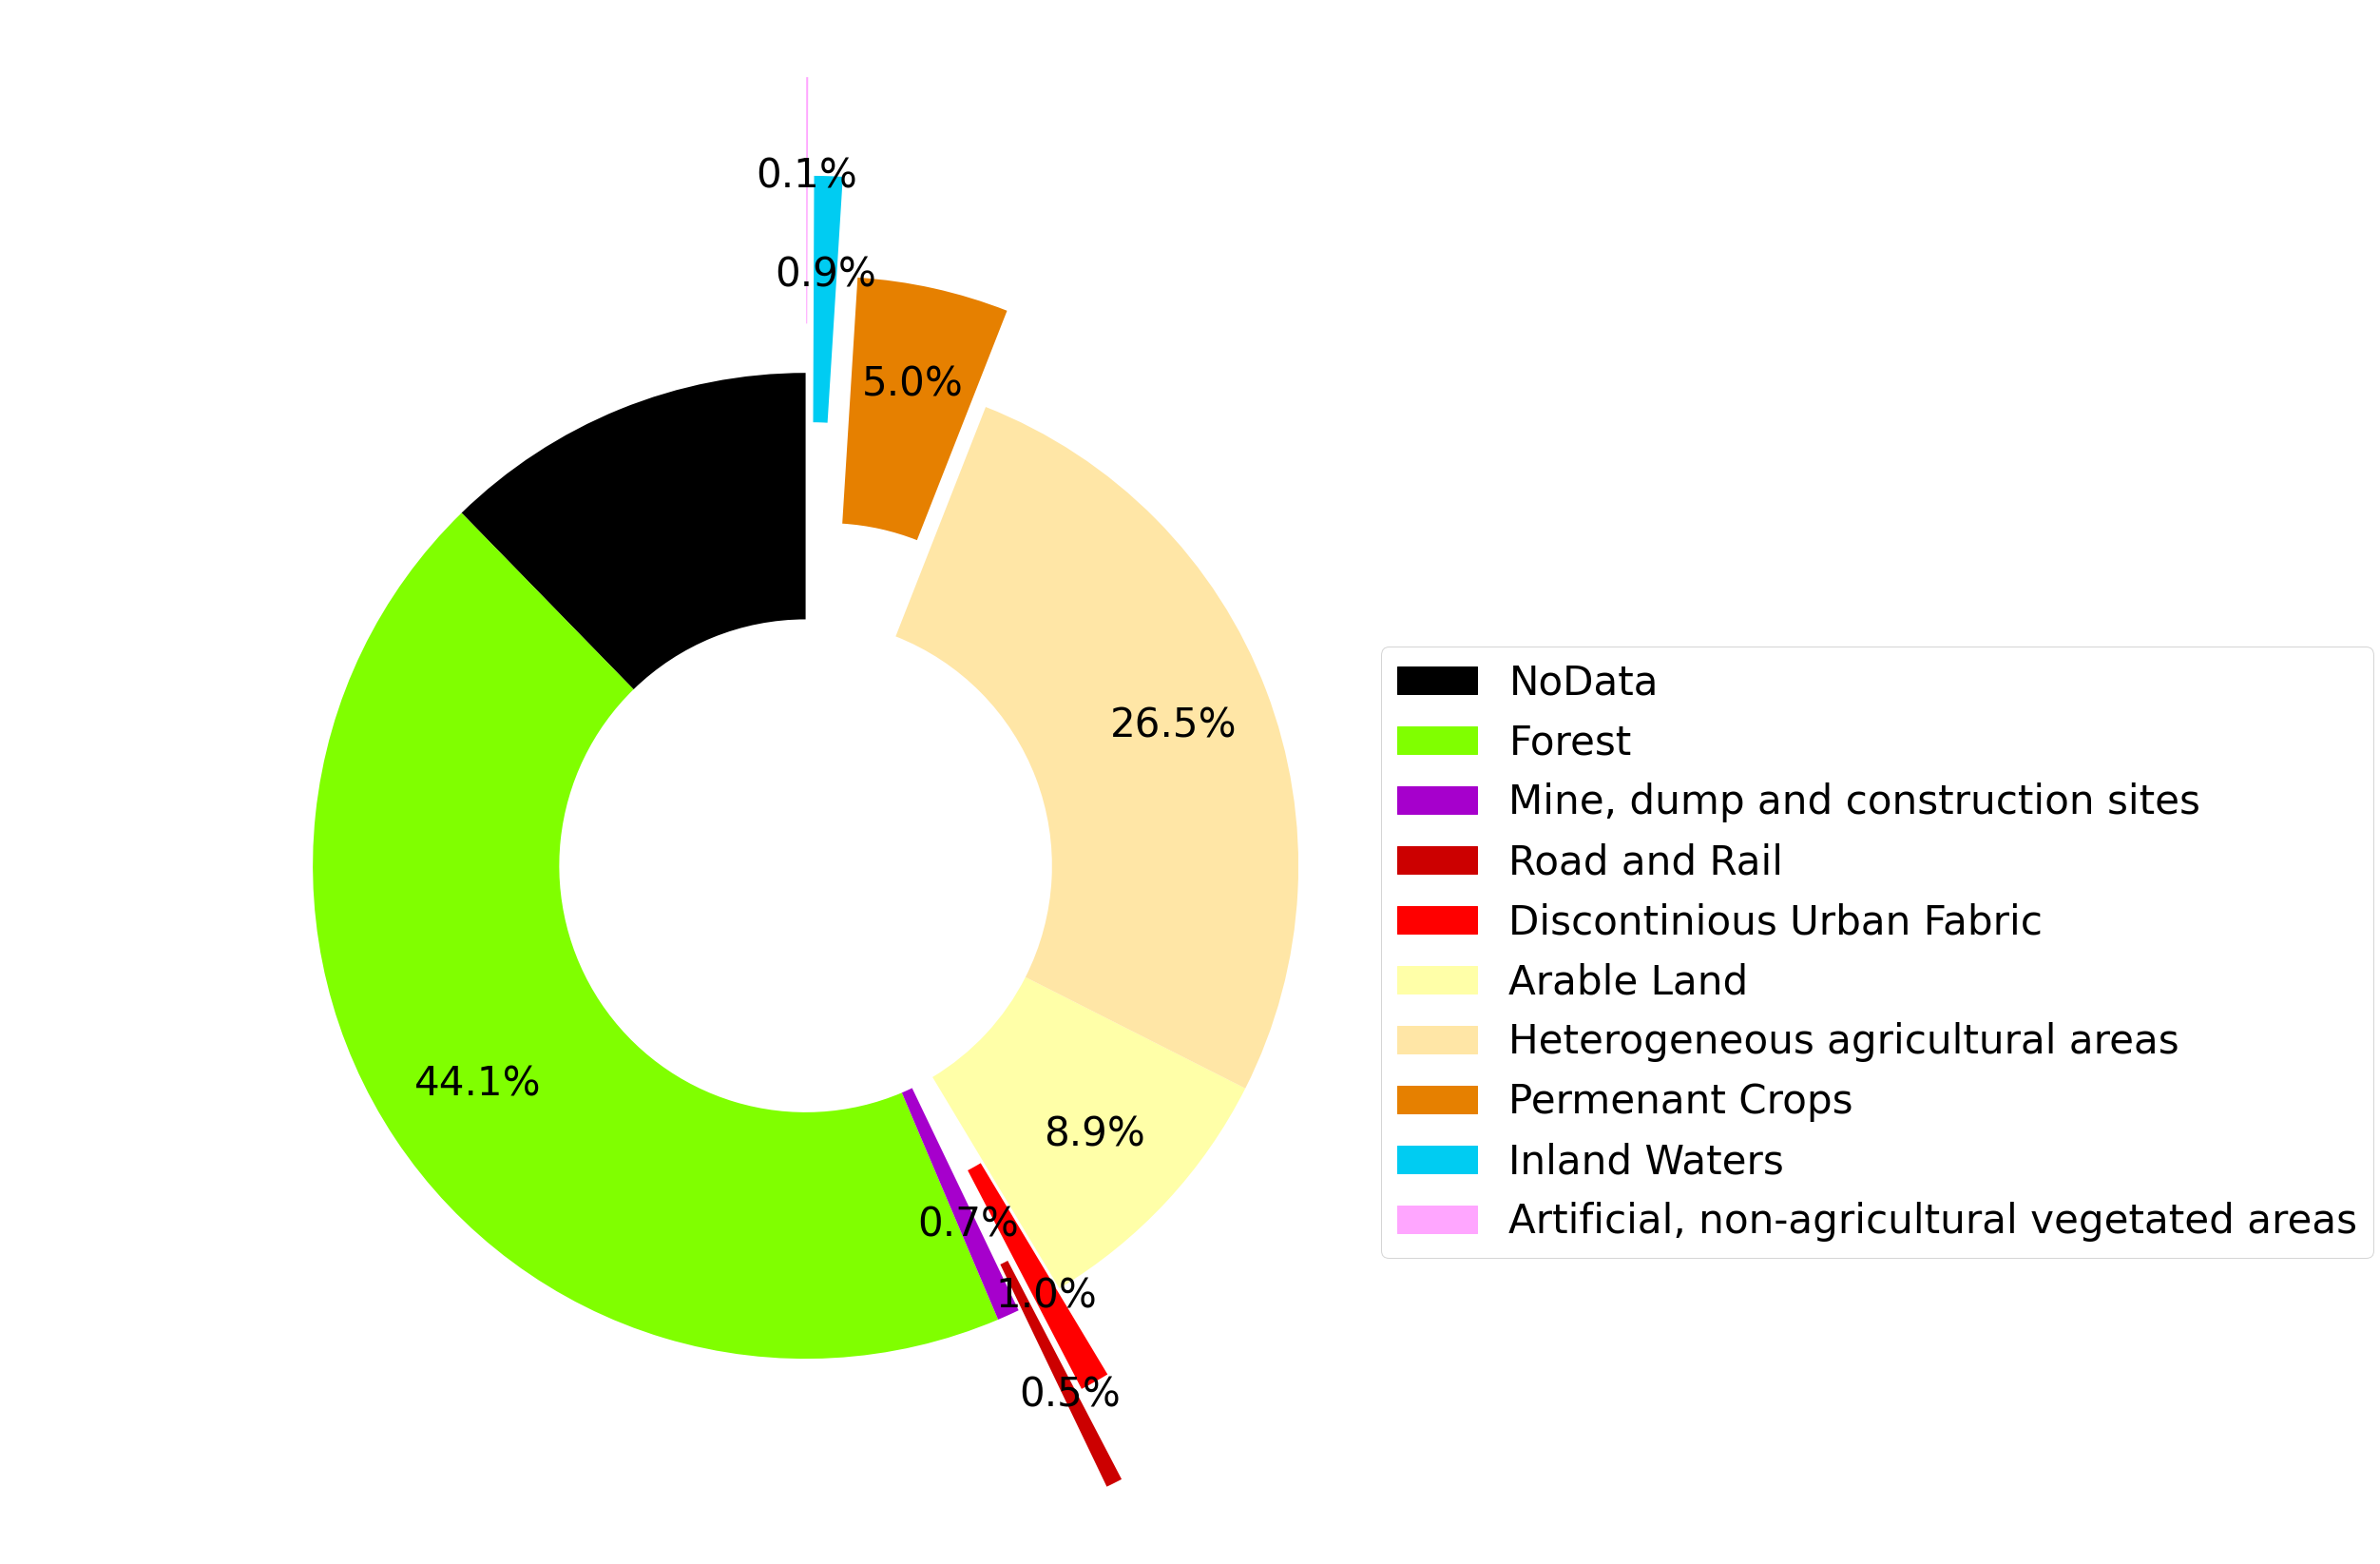

In [8]:
viz_dir = r"C:\Users\CBS-7\Desktop\Tez\Rapor\Visualizations"

sizes = [19315802, 69227402,  1138439,   841818,  1507261, 14029169, 41614177,  7793100,  1457384,    99704]
test_sizes = [1561562, 6091143,   85023,  120763,   93765, 2152649, 4858148,         714940,   20791,   29856]
val_sizes = [5218313, 15553727,   666614,   329417,   335558,  2988136,  4223706,  1894616,   222962,    24231]
train_sizes = [14536303, 44787950,   728526,   826084,  1810630, 11086082, 28045077,  6575668,  1378688,    63328]

explode = (0, 0, 0, 0.4, 0.2, 0,0,0.2,0.4,0.6)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [(0, 0 , 0),(128, 255, 0), (166, 0, 204),(204, 0, 0), (255, 0, 0), (255, 255, 168), (255,230,166),(230, 128, 0), (0, 204, 242), (255, 166, 255)]

clrs = np.asarray(colors) / 255

labels = ['NoData',
               'Forest',
               'Mine, dump and construction sites',
                'Road and Rail',
                'Discontinious Urban Fabric',
               'Arable Land',
               'Heterogeneous agricultural areas',
                'Permenant Crops',
                'Inland Waters',
                'Artificial, non-agricultural vegetated areas'] 

params = {'font.size': 42,
              'xtick.labelsize':32,
              'ytick.labelsize':32}
matplotlib.rcParams.update(params)

fig1, ax1 = plt.subplots()
fig1.set_size_inches(30, 30)

palette = dict(zip(labels, clrs))
handles = [matplotlib.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
matplotlib.rcParams.update(params)
plt.legend(handles=handles,bbox_to_anchor=(0.8, 0, 0.7, 0.6))

ax1.pie(sizes,
        #labels=labels, 
        autopct='%1.1f%%',
        shadow=False,
        colors = clrs,
        explode = explode,
        wedgeprops=dict(width=0.5),
        startangle=90,
        rotatelabels= True,
        pctdistance = 0.8, 
        labeldistance = 1.0)

ax1.axis('equal')  

#plt.savefig(os.path.join(viz_dir,'Pie_Chart_WHOLE_0.png'), pad_inches = 0, transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
labels = ['NoData',
               'Forest',
               'Mine, dump and construction sites',
                'Road and Rail',
                'Discontinious Urban Fabric',
               'Arable Land',
               'Heterogeneous agricultural areas',
                'Permenant Crops',
                'Inland Waters',
                 'Water Courses',
                'Artificial, non-agricultural vegetated areas']

In [ ]:
import numpy as np

train = np.array([0.99854609, 0.95025352, 0.90152959, 0.68763953, 0.77543577,
       0.90222515, 0.90387231, 0.83134876, 0.98278792, 0.        ,
       0.93495081])

val = np.array([0.99838134, 0.94446291, 0.926846  , 0.76349556, 0.85082345,
       0.92329834, 0.88213704, 0.91490435, 0.98269515, 0.        ,
       0.89095212])

test = np.array([0.99871089, 0.95611558, 0.87755942, 0.62549441, 0.71232024,
       0.88209244, 0.92670571, 0.76177778, 0.9828807 , 0.        ,
       0.9835209 ])

In [ ]:
train_percentages = train# [train[i]/np.sum(train) for i in range(len(train))]
val_percentages = val #[val[i]/np.sum(val) for i in range(len(val))]
test_percentages = test #[test[i]/np.sum(test) for i in range(len(test))]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

names = labels
trainvalues = train_percentages
valvalues = val_percentages
testvalues = test_percentages

params = {'font.size': 32,
              'xtick.labelsize':32,
              'ytick.labelsize':32}
matplotlib.rcParams.update(params)

fig, axs = plt.subplots(1, 3, figsize=(42,18), sharey=False)

axs[0].set_title('Train Set')
axs[0].bar(names, trainvalues)
plt.setp(axs[0].get_xticklabels(), rotation=90, ha='center')


plt.setp(axs[1].get_xticklabels(), rotation=90, ha='center')
axs[1].set_title('Validation Set')
axs[1].bar(names, valvalues)

plt.setp(axs[2].get_xticklabels(), rotation=90, ha='center')
axs[2].set_title('Test Set')
axs[2].bar(names, testvalues)

